In [1]:
import pandas as pd
# The '..' navigates up one folder to access the 'data' folder
df = pd.read_csv('../data/ecommerce_sales_cleaned.csv')
# Display the first 5 rows to make sure it loaded correctly
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Total_Revenue,Order_Year,Order_Month,Order_Day_of_Week
0,10107,30,95.70,2,2871.00,2-24-2003 0:00,Shipped,1,2,2003,...,10022,USA,NaN,Yu,Kwai,Small,2871.00,2003,2,2
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,2765.90,2003,5,4
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34,2003,7,3
3,10145,45,83.26,6,3746.70,8-25-2003 0:00,Shipped,3,8,2003,...,90003,USA,NaN,Young,Julie,Medium,3746.70,2003,8,2
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,NaN,USA,NaN,Brown,Julie,Medium,4900.00,2003,10,6


In [2]:
# Check data types and for non-null values
print(df.info())

# Get a statistical summary of numerical columns
print(df.describe())

# Check for any remaining missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ORDERNUMBER        1000 non-null   int64  
 1   QUANTITYORDERED    1000 non-null   int64  
 2   PRICEEACH          1000 non-null   float64
 3   ORDERLINENUMBER    1000 non-null   int64  
 4   SALES              1000 non-null   float64
 5   ORDERDATE          1000 non-null   object 
 6   STATUS             1000 non-null   object 
 7   QTR_ID             1000 non-null   int64  
 8   MONTH_ID           1000 non-null   int64  
 9   YEAR_ID            1000 non-null   int64  
 10  PRODUCTLINE        1000 non-null   object 
 11  MSRP               1000 non-null   int64  
 12  PRODUCTCODE        1000 non-null   object 
 13  CUSTOMERNAME       1000 non-null   object 
 14  PHONE              1000 non-null   object 
 15  ADDRESSLINE1       1000 non-null   object 
 16  ADDRESSLINE2       111 no

In [3]:
# Convert 'SALES' to a numeric type
df['SALES'] = pd.to_numeric(df['SALES'])

# Convert 'MSRP' to a numeric type
df['MSRP'] = pd.to_numeric(df['MSRP'])

In [4]:
# Convert 'ORDERDATE' to a datetime object
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ORDERNUMBER        1000 non-null   int64         
 1   QUANTITYORDERED    1000 non-null   int64         
 2   PRICEEACH          1000 non-null   float64       
 3   ORDERLINENUMBER    1000 non-null   int64         
 4   SALES              1000 non-null   float64       
 5   ORDERDATE          1000 non-null   datetime64[ns]
 6   STATUS             1000 non-null   object        
 7   QTR_ID             1000 non-null   int64         
 8   MONTH_ID           1000 non-null   int64         
 9   YEAR_ID            1000 non-null   int64         
 10  PRODUCTLINE        1000 non-null   object        
 11  MSRP               1000 non-null   int64         
 12  PRODUCTCODE        1000 non-null   object        
 13  CUSTOMERNAME       1000 non-null   object        
 14  PHONE    

In [6]:
# Analyze monthly sales trends
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Total_Revenue'].sum().reset_index()
print("Monthly Sales Trends:")
print(monthly_sales)

# Find top 5 products by revenue
top_products = df.groupby('PRODUCTLINE')['Total_Revenue'].sum().nlargest(5).reset_index()
print("\nTop 5 Products by Revenue:")
print(top_products)

# Find top 5 customers by revenue
top_customers = df.groupby('CUSTOMERNAME')['Total_Revenue'].sum().nlargest(5).reset_index()
print("\nTop 5 Customers by Revenue:")
print(top_customers)

Monthly Sales Trends:
    Order_Year  Order_Month  Total_Revenue
0         2003            1       51189.71
1         2003            2       37917.02
2         2003            3       66869.54
3         2003            4       56320.06
4         2003            5       77790.03
5         2003            6       41547.83
6         2003            7       78453.98
7         2003            8       57839.04
8         2003            9       93842.87
9         2003           10      189398.45
10        2003           11      348668.01
11        2003           12       99902.41
12        2004            1      106241.28
13        2004            2       95980.27
14        2004            3       65862.27
15        2004            4       69505.69
16        2004            5       63716.14
17        2004            6      100106.96
18        2004            7      100184.75
19        2004            8      151417.38
20        2004            9       88048.36
21        2004           10     

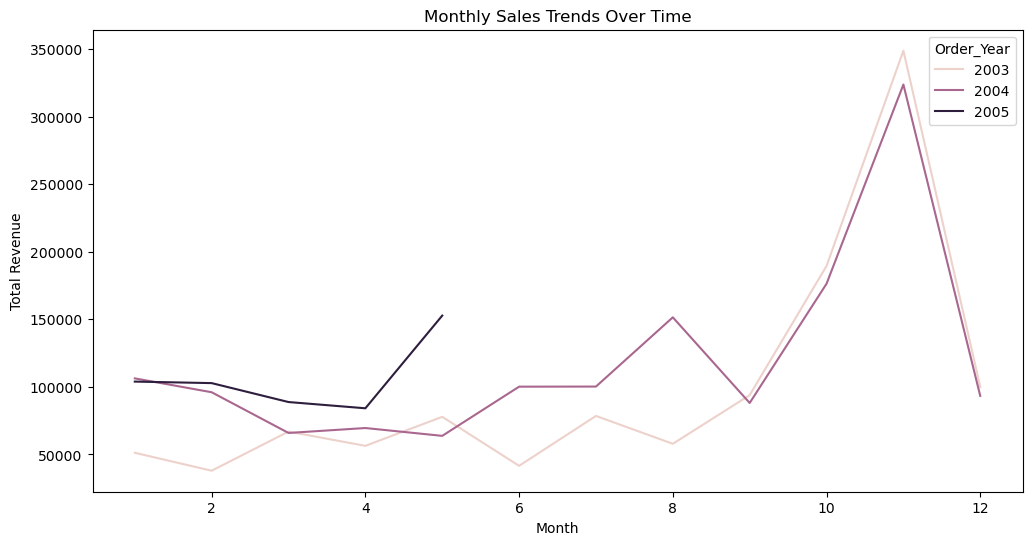

In [10]:
# Create the monthly_sales DataFrame and correctly name the column
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Total_Revenue'].sum().reset_index().rename(columns={'Total_Revenue': 'monthly_revenue'})

# Now, plot the monthly sales trends
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Order_Month', y='monthly_revenue', hue='Order_Year')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [11]:
# Find top 5 products by revenue
top_products = df.groupby('PRODUCTLINE')['Total_Revenue'].sum().nlargest(5).reset_index()
print("Top 5 Products by Revenue:")
print(top_products)

# Find top 5 customers by revenue
top_customers = df.groupby('CUSTOMERNAME')['Total_Revenue'].sum().nlargest(5).reset_index()
print("\nTop 5 Customers by Revenue:")
print(top_customers)

# Find sales by country
sales_by_country = df.groupby('COUNTRY')['Total_Revenue'].sum().reset_index()
print("\nSales by Country:")
print(sales_by_country)

Top 5 Products by Revenue:
        PRODUCTLINE  Total_Revenue
0      Classic Cars     1381997.08
1      Vintage Cars      696585.79
2  Trucks and Buses      444944.45
3       Motorcycles      415486.06
4            Planes      154601.81

Top 5 Customers by Revenue:
                   CUSTOMERNAME  Total_Revenue
0         Euro Shopping Channel      222128.39
1  Mini Gifts Distributors Ltd.      200325.80
2    Australian Collectors, Co.       78776.75
3      Corporate Gift Ideas Co.       73447.20
4         Salzburg Collectables       65845.60

Sales by Country:
        COUNTRY  Total_Revenue
0     Australia      232931.69
1       Austria       91217.72
2       Belgium       28674.22
3        Canada       57706.73
4       Denmark       80080.15
5       Finland       96441.91
6        France      348621.56
7       Germany       62057.36
8       Ireland       10969.75
9         Italy      121589.72
10        Japan       51542.53
11       Norway      106564.07
12  Philippines       22216.64

Top 5 Products by Revenue:
        PRODUCTLINE  total_revenue
0      Classic Cars     1381997.08
1      Vintage Cars      696585.79
2  Trucks and Buses      444944.45
3       Motorcycles      415486.06
4            Planes      154601.81

Top 5 Customers by Revenue:
                   CUSTOMERNAME  customer_lifetime_value
0         Euro Shopping Channel                222128.39
1  Mini Gifts Distributors Ltd.                200325.80
2    Australian Collectors, Co.                 78776.75
3      Corporate Gift Ideas Co.                 73447.20
4         Salzburg Collectables                 65845.60


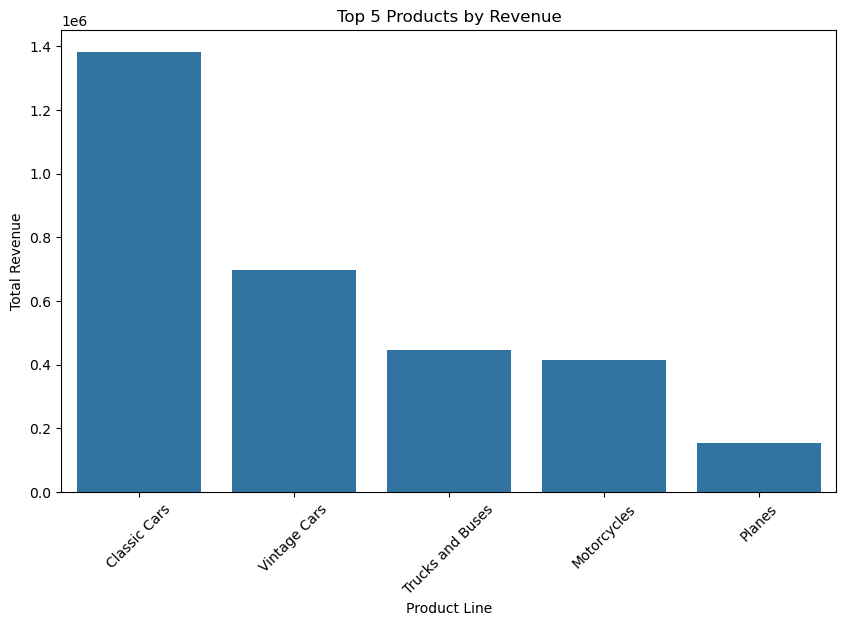

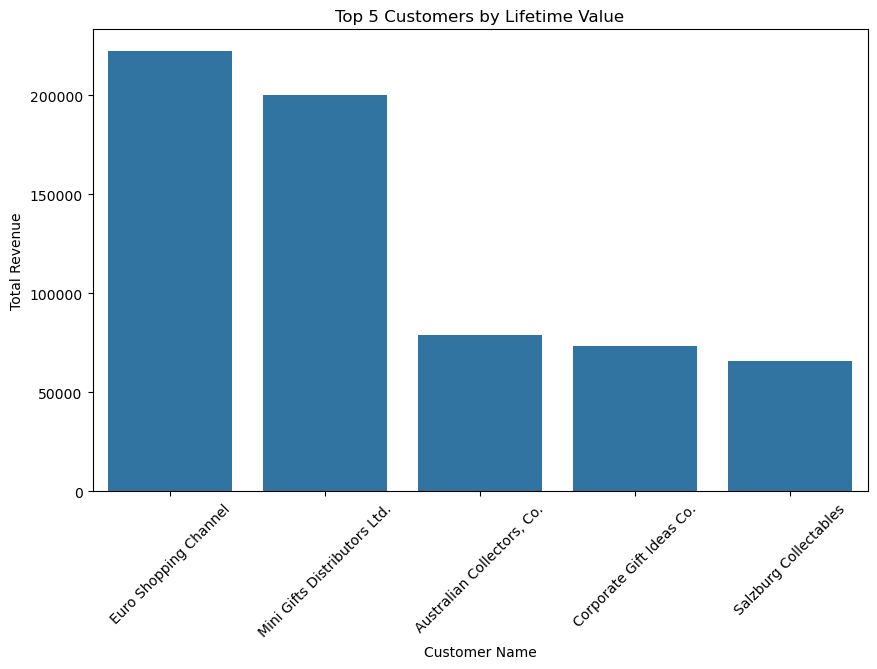

In [13]:
# Create the top_products DataFrame and correctly name the column
top_products = df.groupby('PRODUCTLINE')['Total_Revenue'].sum().nlargest(5).reset_index().rename(columns={'Total_Revenue': 'total_revenue'})
print("Top 5 Products by Revenue:")
print(top_products)

# Create the top_customers DataFrame and correctly name the column
top_customers = df.groupby('CUSTOMERNAME')['Total_Revenue'].sum().nlargest(5).reset_index().rename(columns={'Total_Revenue': 'customer_lifetime_value'})
print("\nTop 5 Customers by Revenue:")
print(top_customers)

# Now, create the visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of top 5 products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='PRODUCTLINE', y='total_revenue')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart of top 5 customers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='CUSTOMERNAME', y='customer_lifetime_value')
plt.title('Top 5 Customers by Lifetime Value')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [15]:
df.to_csv('../DATA/ecommerce_sales_final.csv', index=False)